In [56]:
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [57]:
DATA_DIR = "/Users/baban/Desktop/VS Code/Facial Bias/segments/"

In [58]:
files = os.listdir(DATA_DIR)
# files = ['segment_canada_0_dating_asian.csv']

In [59]:
image_cols = list(map(str,(list(range(1,2049))))) + ['Unnamed: 0',	'userid'] + ['pol_dat_us',	'pol_dat_ca',	'pol_dat_uk',	'pol_fb_us']

In [62]:
samples = []
for file in tqdm(files):
    if file[-3:] =="csv":
        df = pd.read_csv(DATA_DIR+file) 
        df = df.drop(image_cols , axis = 1)

        # df = df[['pol','gender','country','database','gender.value','ethnicity.value']]
        y = df['pol']
        X = df.drop('pol',axis =1 )
        try: 
            _, _, _, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

            samples.append([file.split("_")[1],file.split("_")[2],file.split("_")[3],file.split("_")[4][:-4], y_test.value_counts()['liberal'], y_test.value_counts()['conservative']])

            del df
        except:
            del df
            


100%|██████████| 49/49 [08:20<00:00, 10.22s/it]


In [63]:
samples_df = pd.DataFrame(samples, columns=['Country','Gender','Source','Est. ethnicity', 'Liberal','Conservative'])

samples_df

,Country,Gender,Source,Est. ethnicity,Liberal,Conservative
0,canada,0,dating,asian,251,185
1,united states,0,dating,india,2631,2773
2,united states,0,dating,asian,1883,2025
3,canada,0,dating,india,358,195
4,canada,0,dating,white,1753,1646
5,united kingdom,1,dating,black,537,222
6,united states,0,dating,white,12986,25755
7,united states,1,dating,india,1851,1290
8,united states,0,fb,india,609,390
9,canada,1,dating,asian,464,178


In [71]:
samples_df['Gender'] = samples_df['Gender'].replace({ '0' : "Female", '1' : "Male"})
samples_df['Country'] = samples_df['Country'].replace({'united states':"US",'united kingdom':"UK",'canada':"Canada"})
samples_df['Source'] = samples_df['Source'].replace({'fb':'Facebook','dating':'Dating'})
samples_df['Est. ethnicity'] = samples_df['Est. ethnicity'].replace({'asian':'Asian','india':'India','black':'Black','white':'White'})

In [84]:
# make segment dataset 

segment_df = samples_df.groupby(by=['Country','Gender','Source']).agg('sum')

segment_df['Total'] = segment_df['Liberal'] + segment_df['Conservative']

segment_df

Liberal  Conservative   Total
Country Gender Source                                 
Canada  Female Dating       2853          2326    5179
        Male   Dating       5807          2441    8248
UK      Female Dating       2336          1900    4236
        Male   Dating       3332          2013    5345
US      Female Dating      22714         36607   59321
               Facebook     4430          3072    7502
        Male   Dating      57170         56067  113237
               Facebook     8853          5129   13982

In [87]:
1085710 * 0.2

217142.0

In [88]:
segment_df['Total'].sum()

217050

In [77]:
samples_df.to_csv("/Users/baban/Desktop/VS Code/test codes/result_for_paper/samples_all.csv", index = False)

In [126]:
samples_df.sort_values(by=["Country",'Gender','Source','Est. ethnicity'])

,Country,Gender,Source,Est. ethnicity,Liberal,Conservative
0,Canada,Female,Dating,Asian,251,185
22,Canada,Female,Dating,Black,491,300
3,Canada,Female,Dating,India,358,195
4,Canada,Female,Dating,White,1753,1646
9,Canada,Male,Dating,Asian,464,178
29,Canada,Male,Dating,Black,962,293
11,Canada,Male,Dating,India,211,60
16,Canada,Male,Dating,White,4170,1910
25,UK,Female,Dating,Asian,115,100
14,UK,Female,Dating,Black,358,231


# getting the plots 

In [93]:
dframes = []
for file in tqdm(files):
    if file[-3:] =="csv":
        df = pd.read_csv(DATA_DIR+file) 

        df = df[['pol','gender','country','database','gender.value','ethnicity.value']]

        dframes.append(df)

        del df


100%|██████████| 49/49 [09:42<00:00, 11.88s/it]


In [94]:
# make complete data frame 
plot_df = pd.concat(dframes, axis = 0 )

In [95]:
plot_df.to_csv("/Users/baban/Desktop/VS Code/test codes/result_for_paper/plot_df.csv",index = False)

In [96]:
plot_df['gender.value'] = plot_df['gender.value'].replace({ 0 : "Female", 1 : "Male"})
plot_df['gender'] = plot_df['gender'].replace({ 0 : "Female", 1 : "Male"})
plot_df['country'] = plot_df['country'].replace({'united states':"US",'united kingdom':"UK",'canada':"Canada"})
plot_df['database'] = plot_df['database'].replace({'fb':'Facebook','dating':'Dating'})
plot_df['ethnicity.value'] = plot_df['ethnicity.value'].replace({'asian':'Asian','india':'India','black':'Black','white':'White'})
plot_df['pol'] = plot_df['pol'].replace({'liberal':'Liberal','conservative':'Conservative'})

In [97]:
# change column names 
column_name_dict = {'pol' : "Political Inclinations",
                    'gender':'Self-reported Gender',
                    'database':'Source',
                    'country':'Country',
                    'gender.value':'Est. Gender',
                    'ethnicity.value':'Est. Ethnicity'

}
plot_df = plot_df.rename(columns=column_name_dict )

In [116]:
plot_df.shape

(1085179, 6)

In [98]:
location = '/Users/baban/Desktop/VS Code/test codes/result_for_paper/'

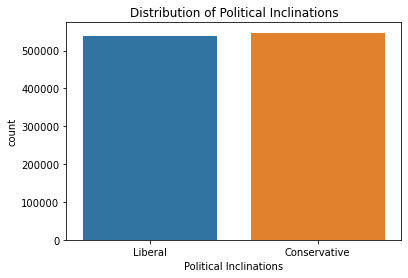

In [107]:
param = 'Political Inclinations'
title = "Distribution of {}".format(param)
sns.countplot(x= param, data= plot_df)
plt.title(title)
plt.savefig(location+title+".png")

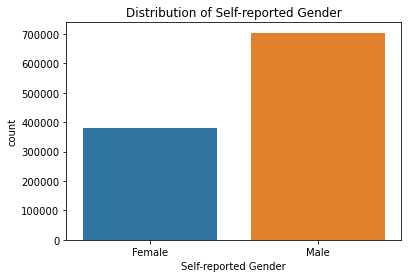

In [108]:
param = 'Self-reported Gender'
title = "Distribution of {}".format(param)
sns.countplot(x= param, data= plot_df)
plt.title(title)
plt.savefig(location+title+".png")

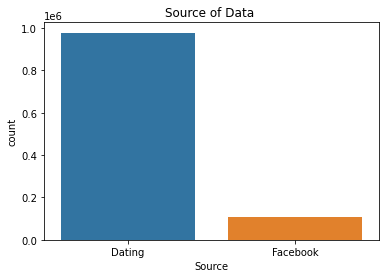

In [112]:
param = 'Source'
title = f"{param} of Data "
sns.countplot(x= param, data= plot_df)
plt.title(title)
plt.savefig(location+title+".png")

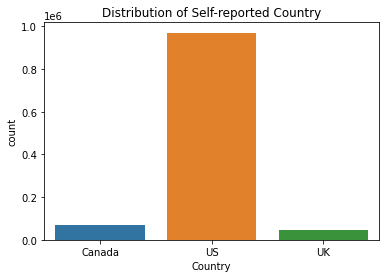

In [113]:
param = 'Country'
title = f"Distribution of Self-reported {param}"
sns.countplot(x= param, data= plot_df)
plt.title(title)
plt.savefig(location+title+".png")

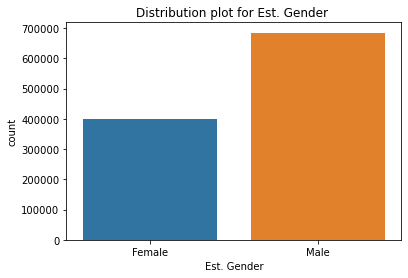

In [114]:
param = 'Est. Gender'
sns.countplot(x= param, data= plot_df)
plt.title("Distribution plot for {} ".format(param))
plt.savefig(location+title+".png")

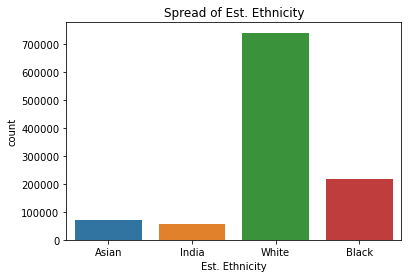

In [115]:
param = 'Est. Ethnicity'
title = f"Spread of {param}"
sns.countplot(x= param, data= plot_df)
plt.title(title)
plt.savefig(location+title+".png")

In [121]:
plot_df['Est. Gender'].value_counts()/plot_df.shape[0]

Male      0.63076
Female    0.36924
Name: Est. Gender, dtype: float64